In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mis-dataset/test2.csv
/kaggle/input/mis-dataset/train2.csv


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Reading**

In [69]:
data = pd.read_csv('/kaggle/input/mis-dataset/train2.csv')

In [70]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


# **EDA**

In [71]:
data.shape

(8068, 11)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [73]:
data = data.drop('ID', axis=1)

In [74]:
data.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [75]:
missing_values = data.isnull().sum()
print(missing_values)

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


In [76]:
# convert this column to numeric
data['Var_1'] = data.Var_1.str.extract(r'(\d)').astype('float64')

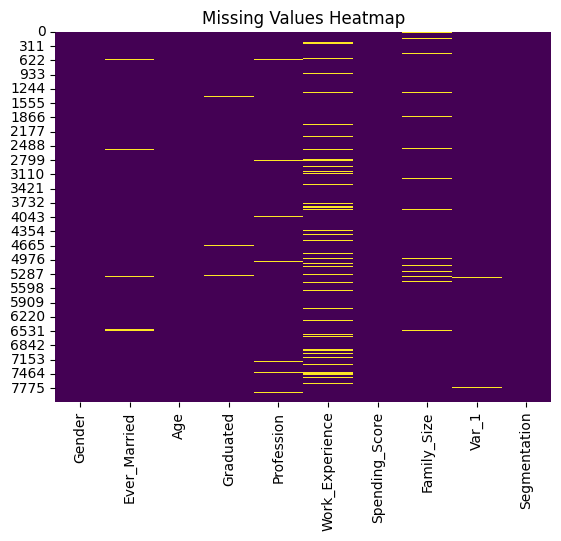

In [77]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [78]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 417


In [79]:
# Remove exact duplicates from the entire DataFrame
data = data.drop_duplicates()

In [80]:
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [81]:
# Univariate Analysis: Numerical features
numerical_features = data.select_dtypes(include=[np.number])
print("\nNumerical Features Summary:")
print(numerical_features.describe())


Numerical Features Summary:
               Age  Work_Experience  Family_Size        Var_1
count  7651.000000      6845.000000  7319.000000  7575.000000
mean     43.584368         2.728415     2.852712     5.106931
std      16.525300         3.449225     1.549283     1.440089
min      18.000000         0.000000     1.000000     1.000000
25%      31.000000         0.000000     2.000000     4.000000
50%      40.000000         1.000000     3.000000     6.000000
75%      53.000000         5.000000     4.000000     6.000000
max      89.000000        14.000000     9.000000     7.000000


In [82]:
# Univariate Analysis: Categorical features
categorical_features = data.select_dtypes(exclude=[np.number])
print("\nCategorical Features Summary:")
print(categorical_features.nunique())


Categorical Features Summary:
Gender            2
Ever_Married      2
Graduated         2
Profession        9
Spending_Score    3
Segmentation      4
dtype: int64


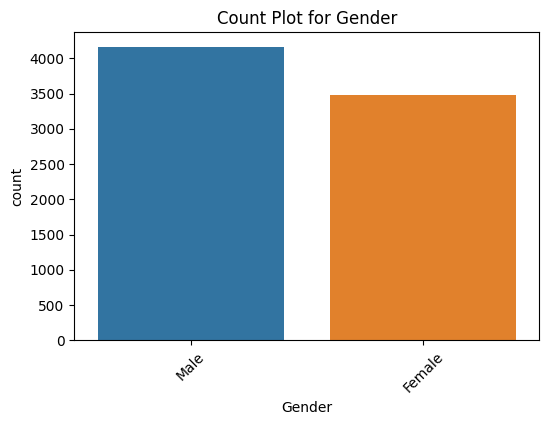

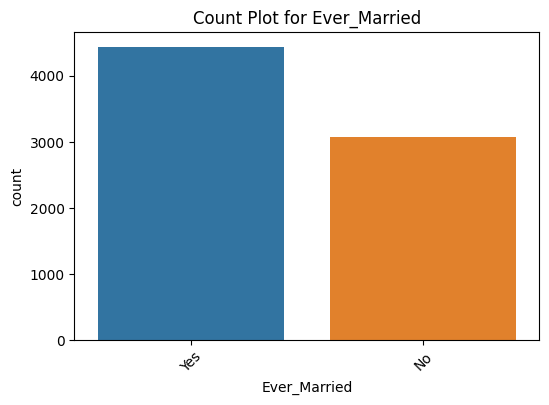

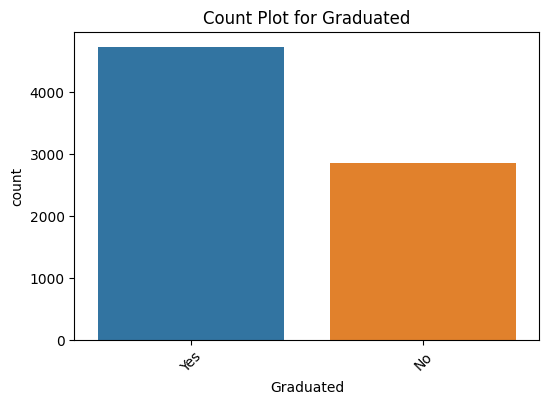

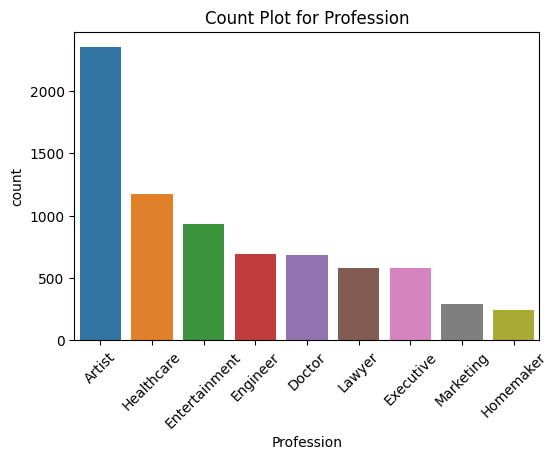

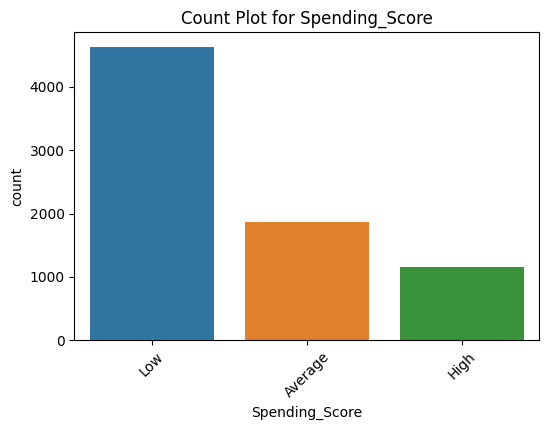

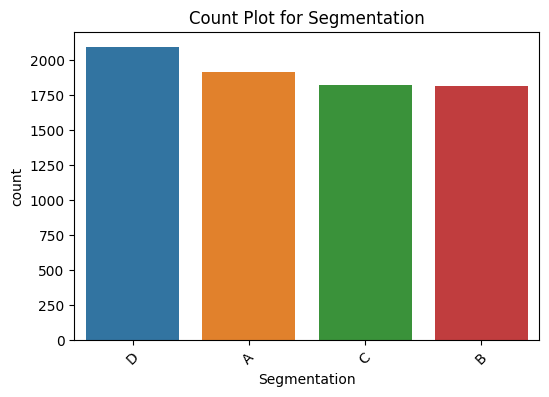

In [83]:
# Visualize categorical feature distributions
for col in categorical_features.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.show()

In [84]:
# Correlation analysis
corr_matrix = numerical_features.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
                      Age  Work_Experience  Family_Size     Var_1
Age              1.000000        -0.201973    -0.268992  0.171920
Work_Experience -0.201973         1.000000    -0.062951  0.036514
Family_Size     -0.268992        -0.062951     1.000000 -0.145653
Var_1            0.171920         0.036514    -0.145653  1.000000


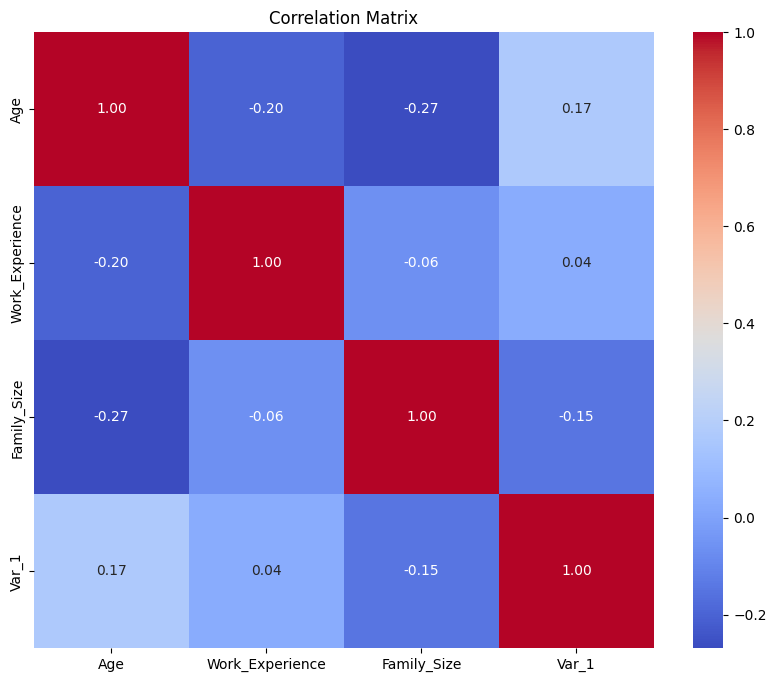

In [85]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [86]:
target=pd.Categorical(data.Segmentation,categories=['A','B','C','D']).codes
data.drop(['Segmentation'],axis=1,inplace=True)
target

array([3, 0, 1, ..., 3, 1, 1], dtype=int8)

In [87]:
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,4.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,6.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,6.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,6.0
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,6.0
8063,Male,No,22,No,NaN,0.0,Low,7.0,1.0
8064,Male,No,35,No,Executive,3.0,Low,4.0,4.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,6.0


In [88]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import SimpleImputer

In [89]:
# Handle Missing Values
# Fill missing values for numerical columns using median
num_imputer = SimpleImputer(strategy='median')
data['Work_Experience'] = num_imputer.fit_transform(data[['Work_Experience']])
data['Family_Size'] = num_imputer.fit_transform(data[['Family_Size']])
data['Var_1'] = num_imputer.fit_transform(data[['Var_1']])

In [90]:
# Initialize the imputer for categorical columns (most frequent strategy)
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for categorical columns
for col in ['Ever_Married', 'Graduated', 'Profession']:
    # Apply imputation and convert the result to a pandas Series before assignment
    data[col] = pd.Series(cat_imputer.fit_transform(data[[col]]).flatten(), index=data.index)

# Check if missing values are filled
print("\nMissing Values after Imputation:")
print(data.isnull().sum())


Missing Values after Imputation:
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


In [91]:
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,4.0
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,4.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,6.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,6.0
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,6.0
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,6.0
8063,Male,No,22,No,Artist,0.0,Low,7.0,1.0
8064,Male,No,35,No,Executive,3.0,Low,4.0,4.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,6.0


In [92]:
data.Gender=pd.Categorical(data.Gender,categories=['Male','Female'],ordered=True).codes
data.Ever_Married=pd.Categorical(data.Ever_Married,categories=['No','Yes'],ordered=True).codes
data.Graduated=pd.Categorical(data.Graduated,categories=['No','Yes'],ordered=True).codes


In [93]:
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,0,22,0,Healthcare,1.0,Low,4.0,4.0
1,1,1,38,1,Engineer,1.0,Average,3.0,4.0
2,1,1,67,1,Engineer,1.0,Low,1.0,6.0
3,0,1,67,1,Lawyer,0.0,High,2.0,6.0
4,1,1,40,1,Entertainment,1.0,High,6.0,6.0
...,...,...,...,...,...,...,...,...,...
8062,0,1,41,1,Artist,0.0,High,5.0,6.0
8063,0,0,22,0,Artist,0.0,Low,7.0,1.0
8064,0,0,35,0,Executive,3.0,Low,4.0,4.0
8066,1,0,27,1,Healthcare,1.0,Low,4.0,6.0


In [94]:
# # One-hot encoding for other categorical features
# cat_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
# data = pd.get_dummies(data, columns=cat_columns, drop_first=True)

In [95]:
data['Spending_Score'] = data['Spending_Score'].map({'Low': 1, 'Average': 2, 'High': 3})

In [96]:
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,0,22,0,Healthcare,1.0,1,4.0,4.0
1,1,1,38,1,Engineer,1.0,2,3.0,4.0
2,1,1,67,1,Engineer,1.0,1,1.0,6.0
3,0,1,67,1,Lawyer,0.0,3,2.0,6.0
4,1,1,40,1,Entertainment,1.0,3,6.0,6.0
...,...,...,...,...,...,...,...,...,...
8062,0,1,41,1,Artist,0.0,3,5.0,6.0
8063,0,0,22,0,Artist,0.0,1,7.0,1.0
8064,0,0,35,0,Executive,3.0,1,4.0,4.0
8066,1,0,27,1,Healthcare,1.0,1,4.0,6.0


In [97]:
profession=pd.get_dummies(data.Profession)
data.drop(['Profession'],axis=1,inplace=True)


In [98]:
data=data.join(profession)


In [99]:
data_df=pd.DataFrame(target,columns=['Segmentation'])
data_df=data_df.join(data)
data_df

,Segmentation,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,3,0.0,0.0,22.0,0.0,1.0,1.0,4.0,4.0,False,False,False,False,False,True,False,False,False
1,0,1.0,1.0,38.0,1.0,1.0,2.0,3.0,4.0,False,False,True,False,False,False,False,False,False
2,1,1.0,1.0,67.0,1.0,1.0,1.0,1.0,6.0,False,False,True,False,False,False,False,False,False
3,1,0.0,1.0,67.0,1.0,0.0,3.0,2.0,6.0,False,False,False,False,False,False,False,True,False
4,0,1.0,1.0,40.0,1.0,1.0,3.0,6.0,6.0,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,1,1.0,0.0,52.0,1.0,1.0,1.0,3.0,6.0,True,False,False,False,False,False,False,False,False
7647,3,0.0,1.0,49.0,1.0,1.0,1.0,2.0,3.0,True,False,False,False,False,False,False,False,False
7648,3,1.0,1.0,30.0,1.0,0.0,2.0,4.0,6.0,False,False,False,False,False,True,False,False,False
7649,1,1.0,1.0,46.0,1.0,9.0,2.0,4.0,6.0,True,False,False,False,False,False,False,False,False


<Axes: >

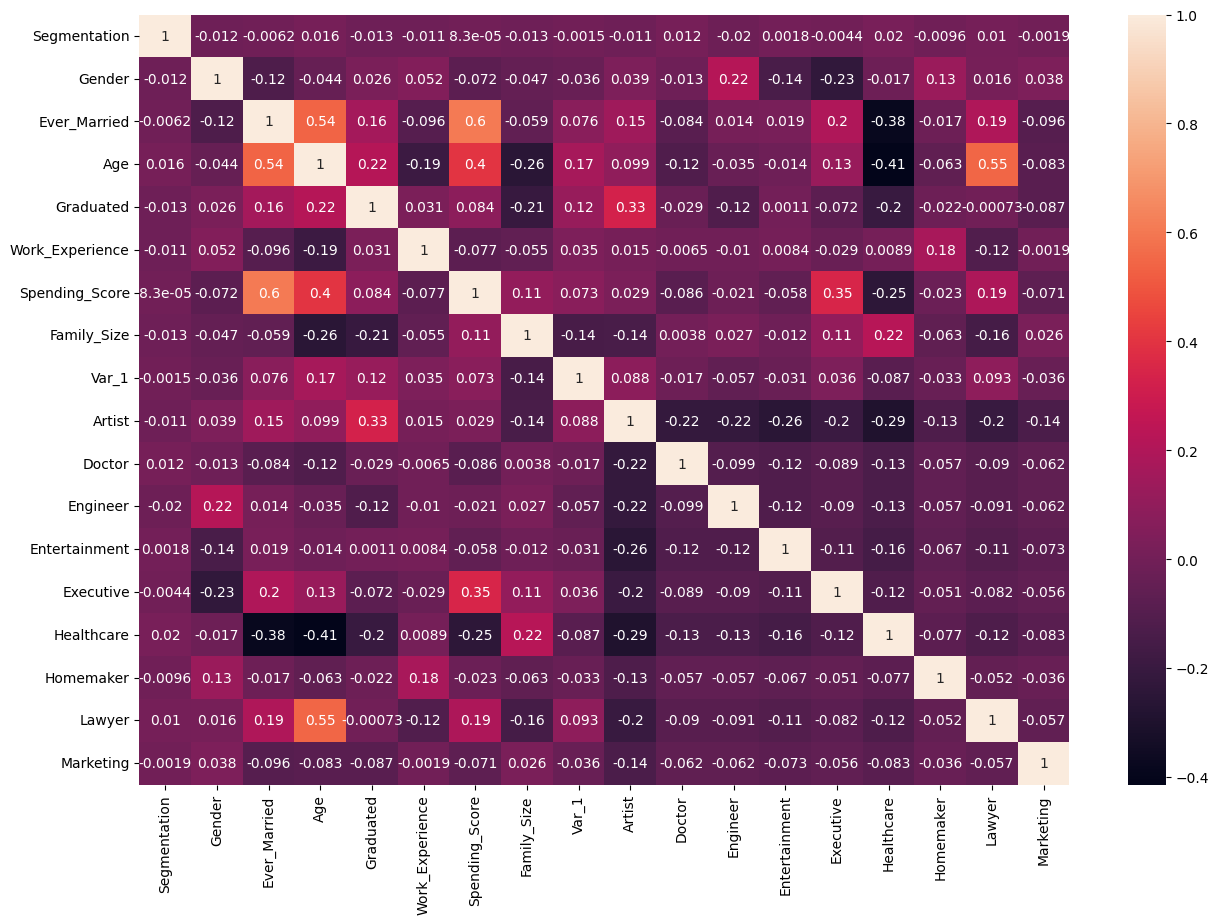

In [100]:
plt.figure(figsize=(15,10))
sns.heatmap(data_df.corr(),annot=True)


In [101]:
# # Feature Engineering
# # Age bins
# data['Age_Bin'] = pd.cut(data['Age'], bins=[18, 30, 50, 89], labels=['Young', 'Middle-aged', 'Elderly'])

# # Encode the Age_Bin feature
# data = pd.get_dummies(data, columns=['Age_Bin'], drop_first=True)

# # Family size categorization
# data['Family_Size_Group'] = pd.cut(data['Family_Size'], bins=[0, 2, 5, 9], labels=['Small', 'Medium', 'Large'])
# data = pd.get_dummies(data, columns=['Family_Size_Group'], drop_first=True)

In [102]:
# Outlier Handling
# Cap Work_Experience at 99th percentile
# work_exp_cap = np.percentile(data['Work_Experience'], 99)
# data['Work_Experience'] = np.where(data['Work_Experience'] > work_exp_cap, work_exp_cap, data['Work_Experience'])

In [103]:
data.shape

(7651, 17)

In [104]:
# #Normalize Numerical Features
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# numerical_cols = ['Age', 'Work_Experience', 'Family_Size']
# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [105]:
# # Separate features and target
# X = data.drop(columns=['Segmentation'])  # Features
# y = data['Segmentation']  # Target

# **Train Test Split**

In [106]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# **Model Training & Evaluation**

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4323971260613978

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.42      0.40       381
           1       0.31      0.30      0.31       371
           2       0.45      0.39      0.42       370
           3       0.57      0.60      0.58       409

    accuracy                           0.43      1531
   macro avg       0.43      0.43      0.43      1531
weighted avg       0.43      0.43      0.43      1531



In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.5009797517962117
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.48      0.44       381
           1       0.39      0.22      0.28       371
           2       0.50      0.59      0.54       370
           3       0.64      0.70      0.67       409

    accuracy                           0.50      1531
   macro avg       0.49      0.50      0.48      1531
weighted avg       0.49      0.50      0.49      1531



In [109]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print('SVM Classification Report:')
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.49052906596995427
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.55      0.45       381
           1       0.37      0.27      0.31       371
           2       0.57      0.49      0.53       370
           3       0.65      0.64      0.64       409

    accuracy                           0.49      1531
   macro avg       0.49      0.49      0.48      1531
weighted avg       0.50      0.49      0.49      1531



In [110]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Segmentation' column
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [111]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print(f'XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}')
print('XGBoost Classification Report:')
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.5081645983017635
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.48      0.46       381
           1       0.41      0.36      0.39       371
           2       0.56      0.52      0.54       370
           3       0.60      0.66      0.63       409

    accuracy                           0.51      1531
   macro avg       0.50      0.50      0.50      1531
weighted avg       0.51      0.51      0.51      1531



In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Define hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    "LightGBM": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100]
    }
}

# 2. Apply GridSearchCV
best_models = {}
for model_name, param_grid in param_grids.items():
    print(f"Running GridSearchCV for: {model_name}")
    if model_name == "XGBoost":
        model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    elif model_name == "LightGBM":
        model = LGBMClassifier()
    elif model_name == "Logistic Regression":
        model = LogisticRegression(max_iter=500)
    elif model_name == "Random Forest":
        model = RandomForestClassifier()
    elif model_name == "SVM":
        model = SVC()
    elif model_name == "KNN":
        model = KNeighborsClassifier()
    elif model_name == "Gradient Boosting":
        model = GradientBoostingClassifier()
    else:
        continue

    # Perform Grid Search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated score: {grid_search.best_score_:.2f}")
    print("-" * 50)

# 3. Evaluate best models on the test set
for model_name, best_model in best_models.items():
    print(f"Evaluating best model for: {model_name}")
    y_pred = best_model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Running GridSearchCV for: Logistic Regression
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best cross-validated score: 0.49
--------------------------------------------------
Running GridSearchCV for: Random Forest
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validated score: 0.52
--------------------------------------------------
Running GridSearchCV for: SVM
Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validated score: 0.50
--------------------------------------------------
Running GridSearchCV for: KNN
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validated score: 0.46
--------------------------------------------------
Running GridSearchCV for: Gradient Boosting
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best cross-validated score: 0.52
-----------------------------------

# **Predicting for Test2**

In [128]:
# Load the test dataset
test_data = pd.read_csv('/kaggle/input/mis-dataset/test2.csv')


In [129]:
test_data = test_data.drop('ID', axis=1)


In [130]:
test_data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,NaN
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,NaN
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,NaN
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,NaN
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,NaN
...,...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
2624,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


In [131]:
# Handle missing values (same strategy as training)
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

test_data['Work_Experience'] = num_imputer.fit_transform(test_data[['Work_Experience']])
test_data['Family_Size'] = num_imputer.fit_transform(test_data[['Family_Size']])
test_data['Var_1'] = test_data.Var_1.str.extract(r'(\d)').astype('float64')
test_data['Var_1'] = num_imputer.fit_transform(test_data[['Var_1']])

for col in ['Ever_Married', 'Graduated', 'Profession']:
    test_data[col] = pd.Series(cat_imputer.fit_transform(test_data[[col]]).flatten(), index=test_data.index)

# Encode categorical variables
test_data['Gender'] = pd.Categorical(test_data.Gender, categories=['Male', 'Female'], ordered=True).codes
test_data['Ever_Married'] = pd.Categorical(test_data.Ever_Married, categories=['No', 'Yes'], ordered=True).codes
test_data['Graduated'] = pd.Categorical(test_data.Graduated, categories=['No', 'Yes'], ordered=True).codes
test_data['Spending_Score'] = test_data['Spending_Score'].map({'Low': 1, 'Average': 2, 'High': 3})

# One-hot encode the 'Profession' column
profession_test = pd.get_dummies(test_data.Profession)
test_data = test_data.drop(['Profession'], axis=1)
test_data = test_data.join(profession_test)



In [132]:
test_data

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,1,36,1,0.0,1,1.0,6.0,NaN,False,False,True,False,False,False,False,False,False
1,0,1,37,1,8.0,2,4.0,6.0,NaN,False,False,False,False,False,True,False,False,False
2,1,1,69,0,0.0,1,1.0,6.0,NaN,True,False,False,False,False,False,False,False,False
3,0,1,59,0,11.0,3,2.0,6.0,NaN,False,False,False,False,True,False,False,False,False
4,1,0,19,0,1.0,1,4.0,6.0,NaN,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,0,0,29,0,9.0,1,4.0,6.0,NaN,False,False,False,False,False,True,False,False,False
2623,1,0,35,1,1.0,1,1.0,6.0,NaN,False,True,False,False,False,False,False,False,False
2624,1,0,53,1,1.0,1,2.0,6.0,NaN,False,False,False,True,False,False,False,False,False
2625,0,1,47,1,1.0,3,5.0,4.0,NaN,False,False,False,False,True,False,False,False,False


In [133]:
test_data = test_data.drop('Segmentation', axis=1)

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']
test_data[numerical_cols] = scaler.fit_transform(test_data[numerical_cols])


In [135]:
test_data

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,1,0.253521,1,0.000000,1,0.000,6.0,False,False,True,False,False,False,False,False,False
1,0,1,0.267606,1,0.571429,2,0.375,6.0,False,False,False,False,False,True,False,False,False
2,1,1,0.718310,0,0.000000,1,0.000,6.0,True,False,False,False,False,False,False,False,False
3,0,1,0.577465,0,0.785714,3,0.125,6.0,False,False,False,False,True,False,False,False,False
4,1,0,0.014085,0,0.071429,1,0.375,6.0,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,0,0,0.154930,0,0.642857,1,0.375,6.0,False,False,False,False,False,True,False,False,False
2623,1,0,0.239437,1,0.071429,1,0.000,6.0,False,True,False,False,False,False,False,False,False
2624,1,0,0.492958,1,0.071429,1,0.125,6.0,False,False,False,True,False,False,False,False,False
2625,0,1,0.408451,1,0.071429,3,0.500,4.0,False,False,False,False,True,False,False,False,False


In [136]:
# Predict the segmentation
y_test_pred = best_models['Gradient Boosting'].predict(test_data)

In [145]:
y_test_pred

array([0, 3, 1, ..., 0, 1, 3])

In [147]:
# Map numeric labels back to segmentation categories
segmentation_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
segmentation_categories = [segmentation_mapping[label] for label in y_test_pred]

# Load the original test dataset
original_test_data = pd.read_csv('/kaggle/input/mis-dataset/test2.csv')

# Add the predicted segmentation categories as a new column
original_test_data['Segmentation'] = segmentation_categories

# Save the updated dataset to a new CSV file
original_test_data.to_csv('test2_predictions.csv', index=False)

# Display the updated dataset (optional)
original_test_data.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,A
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,D
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,B
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,C
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,D


# **Other Experimented**

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Load dataset
# data = pd.read_csv('/kaggle/input/mis-dataset/train2.csv')
# data = data.drop('ID', axis=1)

# # Preprocess the dataset
# # Fill missing values
# imputer = SimpleImputer(strategy='most_frequent')
# data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# # Separate features and target
# X = data.drop(columns=['Segmentation'])  # Assuming 'Segmentation' is the target
# y = data['Segmentation']

# # Check columns before applying one-hot encoding
# print("Columns before preprocessing:", X.columns)

# # Identify categorical columns
# categorical_cols = X.select_dtypes(include=['object']).columns
# print("Categorical columns:", categorical_cols)

# # Set up the OneHotEncoder for categorical columns
# onehotencoder = OneHotEncoder(sparse=False, drop='first')  # `drop='first'` prevents multicollinearity

# # Set up the preprocessor: apply OneHotEncoding to categorical columns and scaling to numerical columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', onehotencoder, categorical_cols),  # OneHotEncoder for categorical features
#         ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns)  # StandardScaler for numeric features
#     ])

# # Initialize models
# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'Random Forest': RandomForestClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier()
# }

# # Leave-One-Out Analysis
# results = {}
# for col in X.columns:
#     X_reduced = X.drop(columns=[col])  # Leave out one column
    
#     # Recompute categorical columns after dropping one
#     reduced_categorical_cols = X_reduced.select_dtypes(include=['object']).columns
#     print(f"Reduced Categorical columns (after dropping '{col}'):", reduced_categorical_cols)
    
#     # Apply the preprocessor to the reduced dataset
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('cat', onehotencoder, reduced_categorical_cols),  # Apply OneHotEncoder to remaining categorical features
#             ('num', StandardScaler(), X_reduced.select_dtypes(exclude=['object']).columns)  # StandardScaler for numeric features
#         ])
    
#     # Transform the reduced dataset
#     X_reduced_processed = preprocessor.fit_transform(X_reduced)
    
#     X_train, X_test, y_train, y_test = train_test_split(X_reduced_processed, y, test_size=0.2, random_state=42)
    
#     for model_name, model in models.items():
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
        
#         # Store predictions in results
#         if col not in results:
#             results[col] = {}
#         results[col][model_name] = y_pred

# # Summarize results
# for col, model_predictions in results.items():
#     print(f"Results when leaving out '{col}':")
#     for model_name, y_pred in model_predictions.items():
#         print(f"\nModel: {model_name}")
#         # Generate and print classification report for each model's predictions
#         print(classification_report(y_test, y_pred))
#     print("\n" + "-" * 50 + "\n")


# **PCA**

In [ ]:
# from sklearn.decomposition import PCA

# # Assuming train_data is already loaded
# # Drop non-numeric columns (if any)
# numeric_data = train_data.drop(columns=['ID', 'Segmentation'], errors='ignore')

# # Standardize the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(numeric_data)

# # Apply PCA
# pca = PCA(n_components=0.95)  # Retain 95% of the variance
# pca_data = pca.fit_transform(scaled_data)

# # Convert the PCA-transformed data back into a DataFrame
# pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# # Print explained variance ratio
# print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# print("Number of Components:", pca.n_components_)

# # Add the Segmentation column back for supervised learning tasks (if needed)
# pca_df['Segmentation'] = train_data['Segmentation'].values

# # Display the first few rows of the PCA-transformed data
# print(pca_df.head())